In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from keras.preprocessing.image import ImageDataGenerator

In [2]:
# Import trainning and validation datasets
train_df = pd.read_csv(
    "/Users/nandjillelola/Documents/Data Science/Projects/Computer_Vision_Xray/Files/data/nih/train-small.csv"
)
valid_df = pd.read_csv(
    "/Users/nandjillelola/Documents/Data Science/Projects/Computer_Vision_Xray/Files/data/nih/valid-small.csv"
)

### Data Cleaning


In [3]:
print(
    f"There are {train_df.shape[0]} rows and {train_df.shape[1]} columns in this dataset"
)
print(train_df.head(5))

There are 1000 rows and 16 columns in this dataset
              Image  Atelectasis  Cardiomegaly  Consolidation  Edema  \
0  00008270_015.png            0             0              0      0   
1  00029855_001.png            1             0              0      0   
2  00001297_000.png            0             0              0      0   
3  00012359_002.png            0             0              0      0   
4  00017951_001.png            0             0              0      0   

   Effusion  Emphysema  Fibrosis  Hernia  Infiltration  Mass  Nodule  \
0         0          0         0       0             0     0       0   
1         1          0         0       0             1     0       0   
2         0          0         0       0             0     0       0   
3         0          0         0       0             0     0       0   
4         0          0         0       0             1     0       0   

   PatientId  Pleural_Thickening  Pneumonia  Pneumothorax  
0       8270           

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Image               1000 non-null   object
 1   Atelectasis         1000 non-null   int64 
 2   Cardiomegaly        1000 non-null   int64 
 3   Consolidation       1000 non-null   int64 
 4   Edema               1000 non-null   int64 
 5   Effusion            1000 non-null   int64 
 6   Emphysema           1000 non-null   int64 
 7   Fibrosis            1000 non-null   int64 
 8   Hernia              1000 non-null   int64 
 9   Infiltration        1000 non-null   int64 
 10  Mass                1000 non-null   int64 
 11  Nodule              1000 non-null   int64 
 12  PatientId           1000 non-null   int64 
 13  Pleural_Thickening  1000 non-null   int64 
 14  Pneumonia           1000 non-null   int64 
 15  Pneumothorax        1000 non-null   int64 
dtypes: int64(15), object(1)
m

In [5]:
train_df.isnull().sum()

Image                 0
Atelectasis           0
Cardiomegaly          0
Consolidation         0
Edema                 0
Effusion              0
Emphysema             0
Fibrosis              0
Hernia                0
Infiltration          0
Mass                  0
Nodule                0
PatientId             0
Pleural_Thickening    0
Pneumonia             0
Pneumothorax          0
dtype: int64

In [6]:
print(
    f"There are {train_df['PatientId'].count()} patients and {train_df['PatientId'].value_counts().shape[0]} are unique"
)

There are 1000 patients and 928 are unique


In [7]:
print(
    f"There are {valid_df.shape[0]} rows and {valid_df.shape[1]} columns in this dataset"
)
print(valid_df.head(5))

There are 109 rows and 16 columns in this dataset
              Image  Atelectasis  Cardiomegaly  Consolidation  Edema  \
0  00027623_007.png            0             0              0      1   
1  00028214_000.png            0             0              0      0   
2  00022764_014.png            0             0              0      0   
3  00020649_001.png            1             0              0      0   
4  00022283_023.png            0             0              0      0   

   Effusion  Emphysema  Fibrosis  Hernia  Infiltration  Mass  Nodule  \
0         1          0         0       0             0     0       0   
1         0          0         0       0             0     0       0   
2         0          0         0       0             0     0       0   
3         1          0         0       0             0     0       0   
4         0          0         0       0             0     0       0   

   PatientId  Pleural_Thickening  Pneumonia  Pneumothorax  
0      27623            

In [8]:
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Image               109 non-null    object
 1   Atelectasis         109 non-null    int64 
 2   Cardiomegaly        109 non-null    int64 
 3   Consolidation       109 non-null    int64 
 4   Edema               109 non-null    int64 
 5   Effusion            109 non-null    int64 
 6   Emphysema           109 non-null    int64 
 7   Fibrosis            109 non-null    int64 
 8   Hernia              109 non-null    int64 
 9   Infiltration        109 non-null    int64 
 10  Mass                109 non-null    int64 
 11  Nodule              109 non-null    int64 
 12  PatientId           109 non-null    int64 
 13  Pleural_Thickening  109 non-null    int64 
 14  Pneumonia           109 non-null    int64 
 15  Pneumothorax        109 non-null    int64 
dtypes: int64(15), object(1)
me

In [9]:
valid_df.isnull().sum()

Image                 0
Atelectasis           0
Cardiomegaly          0
Consolidation         0
Edema                 0
Effusion              0
Emphysema             0
Fibrosis              0
Hernia                0
Infiltration          0
Mass                  0
Nodule                0
PatientId             0
Pleural_Thickening    0
Pneumonia             0
Pneumothorax          0
dtype: int64

In [10]:
# Remove Image and Patient ID columns

columns_to_remove = ["Image", "PatientId"]

train_columns = train_df.drop(columns=columns_to_remove)
valid_columns = valid_df.drop(columns=columns_to_remove)

In [11]:
train_columns = train_columns.keys()
train_columns = list(train_columns)
print(f"There are {len(train_columns)} with the following labels {train_columns}")

There are 14 with the following labels ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


In [12]:
valid_columns = valid_columns.keys()
valid_columns = list(valid_columns)
print(f"There are {len(valid_columns)} with the following labels {valid_columns}")

There are 14 with the following labels ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


In [13]:
# Create a function for the number of postive labels for each class
disease_train = {}
disease_valid = {}


def possitve_samples(name, df, columns, dictonary):
    for column in columns:
        dictonary[column] = df[column].sum()
        print(f"{name}: The class {column} has {df[column].sum()} positive samples")


possitve_samples("Train", train_df, train_columns, disease_train)

Train: The class Atelectasis has 106 positive samples
Train: The class Cardiomegaly has 20 positive samples
Train: The class Consolidation has 33 positive samples
Train: The class Edema has 16 positive samples
Train: The class Effusion has 128 positive samples
Train: The class Emphysema has 13 positive samples
Train: The class Fibrosis has 14 positive samples
Train: The class Hernia has 2 positive samples
Train: The class Infiltration has 175 positive samples
Train: The class Mass has 45 positive samples
Train: The class Nodule has 54 positive samples
Train: The class Pleural_Thickening has 21 positive samples
Train: The class Pneumonia has 10 positive samples
Train: The class Pneumothorax has 38 positive samples


In [14]:
possitve_samples("Valid", valid_df, valid_columns, disease_valid)

Valid: The class Atelectasis has 7 positive samples
Valid: The class Cardiomegaly has 2 positive samples
Valid: The class Consolidation has 5 positive samples
Valid: The class Edema has 2 positive samples
Valid: The class Effusion has 15 positive samples
Valid: The class Emphysema has 1 positive samples
Valid: The class Fibrosis has 2 positive samples
Valid: The class Hernia has 0 positive samples
Valid: The class Infiltration has 22 positive samples
Valid: The class Mass has 10 positive samples
Valid: The class Nodule has 7 positive samples
Valid: The class Pleural_Thickening has 1 positive samples
Valid: The class Pneumonia has 3 positive samples
Valid: The class Pneumothorax has 4 positive samples


In [15]:
# Check the dataset for overlapping IDs


# Create a set to identify unique id's
def overlapping_patients(train, valid):
    # Extract patient id's from both training and validation sets
    ids_train = train.PatientId
    ids_valid = valid.PatientId

    # Create a set to identify unique id's
    ids_train_set = set(ids_train)
    print(f"There are {len(ids_train_set)} unique patient Ids in the training set")
    print("")
    ids_valid_set = set(ids_valid)
    print(f"There are {len(ids_valid_set)} unique patient Ids in the validation set")
    print("")

    # Identify any overlapping by looking at the intersection between sets
    patient_overlap = list(ids_train_set.intersection(ids_valid_set))
    num_overlap = len(patient_overlap)
    print(
        f"There are {num_overlap} Patient IDs in both the training and validation sets"
    )
    print("")
    print(f"These patients are in both the training and validation datasets:")
    print(f"{patient_overlap}")

    # Remove overlapping patients from validation set
    train_overlap_idxs = []
    valid_overlap_idxs = []

    for idx in range(num_overlap):
        train_overlap_idxs.extend(
            train_df.index[train_df["PatientId"] == patient_overlap[idx]].tolist()
        )
        valid_overlap_idxs.extend(
            valid_df.index[valid_df["PatientId"] == patient_overlap[idx]].tolist()
        )

    print(f"These are the indices of overlapping patients in the training set: ")
    print(f"{train_overlap_idxs}")
    print(f"These are the indices of overlapping patients in the validation set: ")
    print(f"{valid_overlap_idxs}")

    # Drop overlapping rows from the validation set
    valid_df.drop(valid_overlap_idxs, inplace=True)

    # Check to insure there are not overlapping patient Ids
    ids_valid = valid_df.PatientId
    ids_valid_set = set(ids_valid)
    print("")
    print(f"There are {len(ids_valid_set)} unique Patient IDs in the training set")

    # Identify patient overlap by looking at the intersection between the sets
    patient_overlap = list(ids_train_set.intersection(ids_valid_set))
    num_overlap = len(patient_overlap)
    print(
        f"There are {num_overlap} Patient IDs in both the training and validation sets"
    )


overlapping_patients(train_df, valid_df)

There are 928 unique patient Ids in the training set

There are 97 unique patient Ids in the validation set

There are 11 Patient IDs in both the training and validation sets

These patients are in both the training and validation datasets:
[20290, 27618, 9925, 10888, 22764, 19981, 18253, 4461, 28208, 8760, 7482]
These are the indices of overlapping patients in the training set: 
[306, 186, 797, 98, 408, 917, 327, 913, 10, 51, 276]
These are the indices of overlapping patients in the validation set: 
[104, 88, 65, 13, 2, 41, 56, 70, 26, 75, 20, 52, 55]

There are 86 unique Patient IDs in the training set
There are 0 Patient IDs in both the training and validation sets


### Image Processing


In [31]:
# Normalize images
image_generator = ImageDataGenerator(
    samplewise_center=True, samplewise_std_normalization=True
)

In [36]:
# Flow from directory with specified batch size and target image size
generator = image_generator.flow_from_dataframe(
    dataframe=train_df,
    directory="/Users/nandjillelola/Documents/Data Science/Projects/Computer_Vision_Xray/Files/data/nih/images-small",
    x_col="Image",
    y_col=["Mass"],
    class_mode="raw",
    batch_size=1,
    shuffle=False,
    target_size=(320, 320),
)

Found 1000 validated image filenames.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The dimensions of the image are 320 pixels width and 320 pixels height
The maximum pixel value is 1.8578 and the minimum is -1.7167
The mean value of the pixels is 0.0000 and the standard deviation is 1.0000


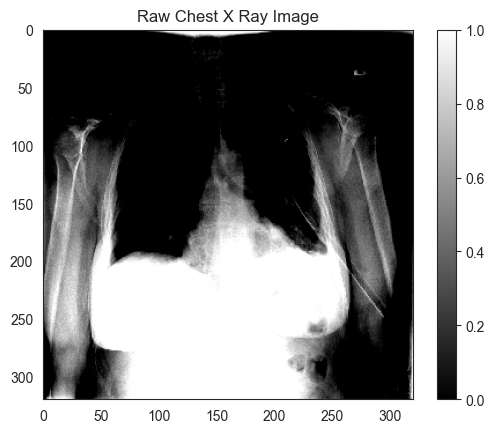

In [44]:
# Plot a processed image
sns.set_style("white")
generated_image, label = generator.__getitem__(15)
plt.imshow(generated_image[0], cmap="gray")
plt.colorbar()
plt.title("Raw Chest X Ray Image")
print(
    f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height"
)
print(
    f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}"
)
print(
    f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}"
)

### EDA


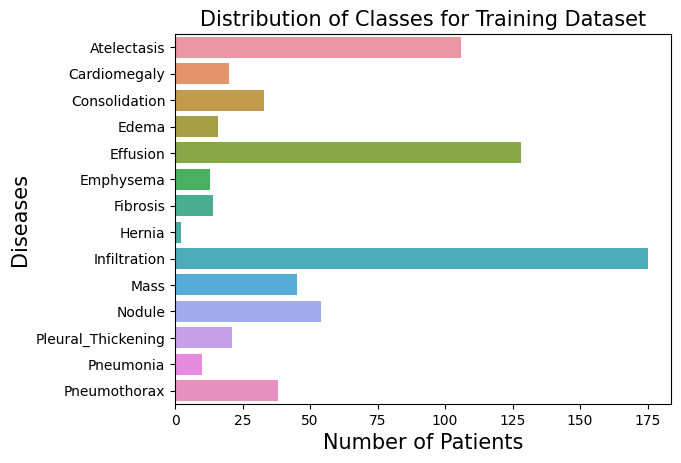

In [16]:
# Plot the distribution of the counts
def distribution_class(df, title):
    keys = list(df.keys())
    values = list(df.values())
    sns.barplot(x=values, y=keys)
    plt.title(f"Distribution of Classes for {title} Dataset", fontsize="15")
    plt.xlabel("Number of Patients", fontsize="15")
    plt.ylabel("Diseases", fontsize="15")
    plt.show()


distribution_class(disease_train, "Training")

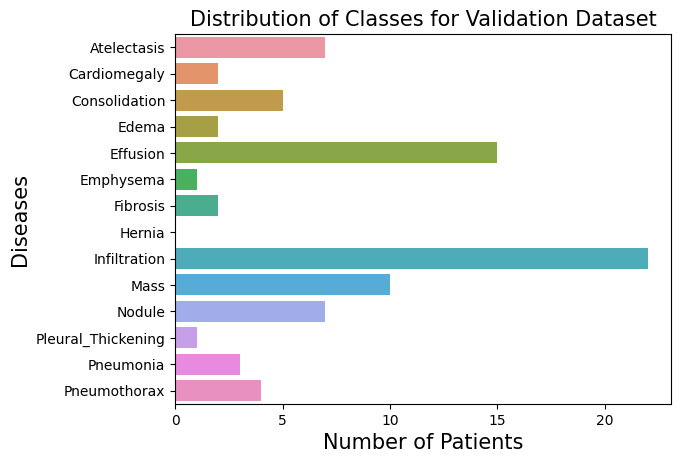

In [17]:
distribution_class(disease_valid, "Validation")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Display Random Images


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


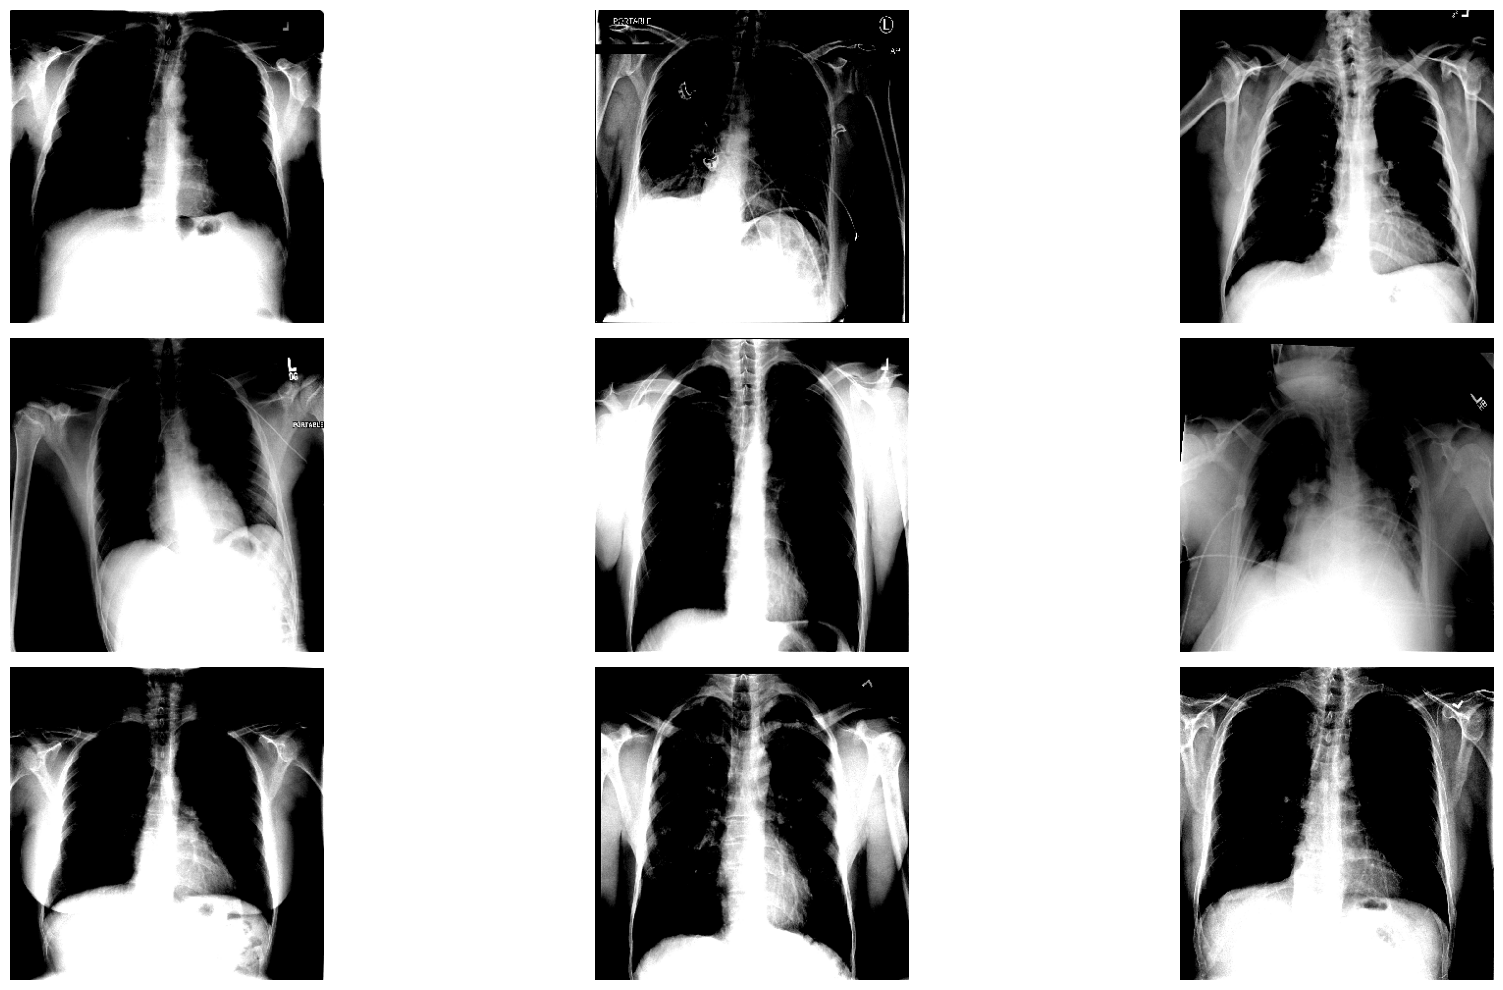

In [46]:
def display_images(generator, num_images=9):
    plt.figure(figsize=(20, 10))
    print("Display Random Images")
    # Iterate through and plot images
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        generated_image, _ = generator.__getitem__(
            i
        )  # Get generated image from the generator
        plt.imshow(generated_image[0], cmap="gray")
        plt.axis("off")
    plt.tight_layout()


# Example usage:
display_images(generator, num_images=9)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The dimensions of the image are 320 pixels wide and 320 pixels long
The maximum pixel value is 1.8578 and the minimum is -1.7167
The mean value of the pixels is 0.0000 and the standard deviation is 1.0000


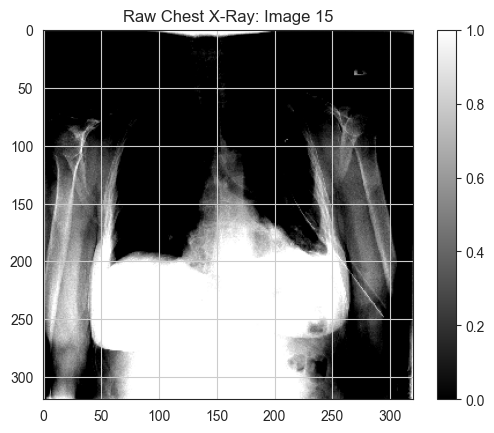

In [47]:
def investigate_image(generator, image_number):
    generated_image, label = generator.__getitem__(image_number)
    plt.imshow(generated_image[0], cmap="gray")
    plt.colorbar()
    plt.grid("on")
    plt.title(f"Raw Chest X-Ray: Image {image_number}")
    print(
        f"The dimensions of the image are {generated_image.shape[1]} pixels wide and {generated_image.shape[2]} pixels long"
    )
    print(
        f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}"
    )
    print(
        f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}"
    )


# Example usage:
investigate_image(generator, 15)

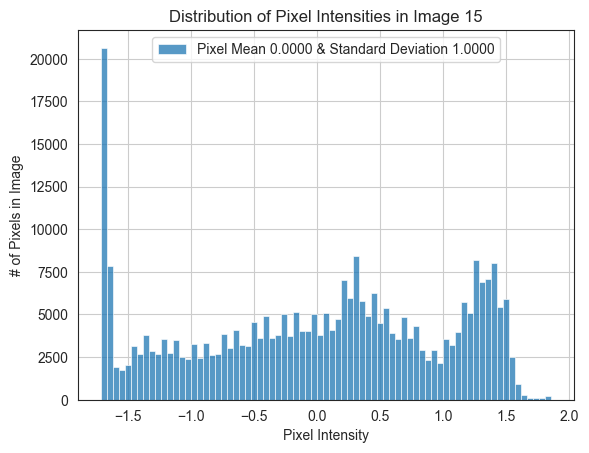

In [48]:
def pixel_distribution(generator, image_number):
    generated_image, _ = generator.__getitem__(image_number)
    sns.histplot(
        generated_image[0].ravel(),
        label=f"Pixel Mean {np.mean(generated_image):.4f} & Standard Deviation {np.std(generated_image):.4f}",
        kde=False,
    )
    plt.legend(loc="upper center")
    plt.grid()
    plt.title(f"Distribution of Pixel Intensities in Image {image_number}")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("# of Pixels in Image")
    plt.show()


# Example usage:
pixel_distribution(generator, 15)